# **Ontology & Graph Querying**

### In this , we aim to build an ontology representing major cities in Israel and their connections. An ontology provides a structured framework to represent knowledge as a set of concepts within a domain and the relationships between those concepts.

**Key Components:-**

1. Classes (Concepts):- City: Represents a city entity.
2. Individuals (Instances):- Each city (e.g., Jerusalem, Tel Aviv, Haifa) is an instance of the City class.
3. Properties:-
  
  rdf:type: Defines the type of the resource, which in this case is City.
  
  schema:name: Represents the name of the city.

**RDF Triples**
An RDF (Resource Description Framework) triple consists of a subject, a predicate, and an object. In this case:

1. Subject: The URI representing a city (e.g., http://sws.geonames.org/281184 for Jerusalem).
2. Predicate: The property or attribute (e.g., rdf:type, schema:name).
3. Object: The value of the attribute (e.g., City type, city name).

In [2]:
from rdflib import Graph
import matplotlib.pyplot as plt
from rdflib.plugins.sparql import prepareQuery
import plotly.graph_objects as go
from rdflib.namespace import RDF, RDFS, FOAF
import networkx as nx
import plotly.express as px
import pandas as pd
from rdflib import Graph, URIRef, Literal, RDF, RDFS, FOAF, Namespace
from rdflib.namespace import XSD

In [3]:
g = Graph()
GEONAMES = "http://sws.geonames.org/"
SCHEMA = Namespace("http://schema.org/")

In [4]:
cities_in_israel = {
    "Jerusalem": GEONAMES + "281184",
    "Tel Aviv": GEONAMES + "293397",
    "Haifa": GEONAMES + "294801",
    "Ashdod": GEONAMES + "295094",
    "Rishon LeZion": GEONAMES + "293744",
    "Petah Tikva": GEONAMES + "293785",
    "Netanya": GEONAMES + "294044",
    "Beersheba": GEONAMES + "295189",
    "Holon": GEONAMES + "294011",
    "Bnei Brak": GEONAMES + "293734",
    "Rehovot": GEONAMES + "293799",
    "Bat Yam": GEONAMES + "293727",
    "Ashkelon": GEONAMES + "295104",
    "Herzliya": GEONAMES + "294024",
    "Kfar Saba": GEONAMES + "293761",
    "Hadera": GEONAMES + "294035",
    "Nazareth": GEONAMES + "294061",
}

In [5]:
for city, geonames_uri in cities_in_israel.items():
    city_uri = URIRef(geonames_uri)
    g.add((city_uri, URIRef("http://www.w3.org/1999/02/22-rdf-syntax-ns#type"), URIRef("http://schema.org/City")))
    g.add((city_uri, URIRef("http://schema.org/name"), Literal(city, lang="en")))

In [6]:
q = prepareQuery("SELECT ?city ?name WHERE { ?city a <http://schema.org/City>; <http://schema.org/name> ?name }")
results = g.query(q)

In [7]:
city_nodes = {}
for row in results:
    city_nodes[row[0]] = row[1]

In [8]:
G = nx.Graph()

In [9]:
for node, label in city_nodes.items():
    G.add_node(node, label=label)
for node1 in city_nodes:
    for node2 in city_nodes:
        if node1 != node2:
            G.add_edge(node1, node2)

In [10]:
for node1 in city_nodes:
    for node2 in city_nodes:
        if node1 != node2:
            G.add_edge(node1, node2)

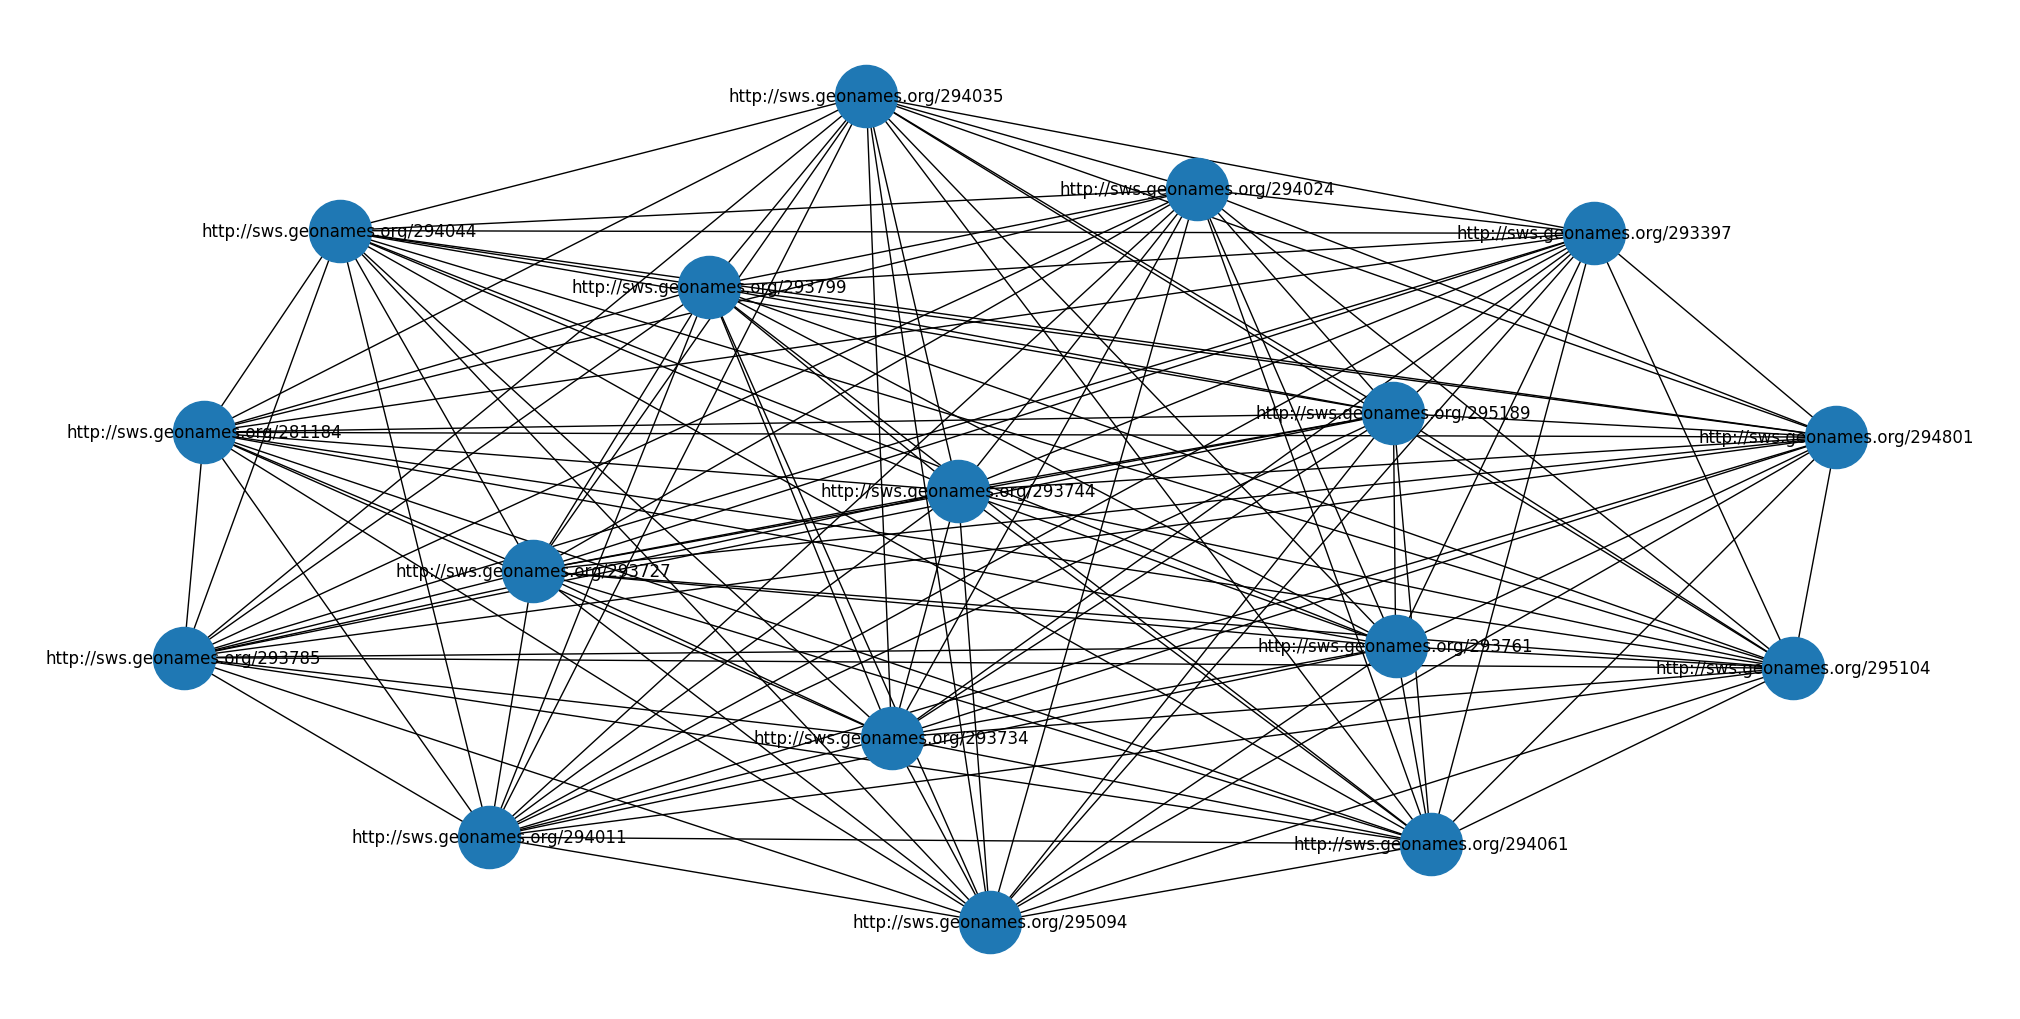

In [11]:
plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, font_size=12)
plt.show()

In [12]:
city_coordinates = {
    "Jerusalem": (31.7683, 35.2137),
    "Tel Aviv": (32.0853, 34.7818),
    "Haifa": (32.8156, 34.9664),
    "Rishon LeZion": (31.9730, 34.7925),
    "Petah Tikva": (32.0878, 34.8869),
    "Netanya": (32.3215, 34.8532),
    "Beersheba": (31.2530, 34.7915)
}

In [13]:
df = pd.DataFrame(list(city_coordinates.items()), columns=['City', 'Coordinates'])
df[['Latitude', 'Longitude']] = pd.DataFrame(df['Coordinates'].tolist(), index=df.index)

In [14]:
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", hover_name="City",
                        zoom=8, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

#**Ontology Graph Using Plotly**

In [15]:
node_x = [pos[node][0] for node in G.nodes()]
node_y = [pos[node][1] for node in G.nodes()]

In [16]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

fig = go.Figure()

In [17]:
fig.add_trace(go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'))

fig.add_trace(go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        colorscale='YlGnBu',
        size=10,
        line_width=2)))

fig.add_trace(go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        colorscale='YlGnBu',
        size=10,
        line_width=2)))

# Add node labels
for node, (x, y) in pos.items():
    fig.add_annotation(
        x=x, y=y,
        xref="x", yref="y",
        text=city_nodes[node],
        showarrow=False,
        font=dict(size=10))

In [18]:
fig.update_layout(
    title='Ontology Graph',
    showlegend=False,
    hovermode='closest',
    margin=dict(b=20,l=5,r=5,t=40),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))

fig.show()

In [30]:
import json

fig.update_layout(
    title='Ontology Graph',
    showlegend=False,
    hovermode='closest',
    margin=dict(b=20,l=5,r=5,t=40),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
)

fig.show()

fig_json = fig.to_json()
with open('ontology_graph.json', 'w') as f:
    json.dump(fig_json, f)

#**Graph Analysis**

In [19]:
degree_centrality = nx.degree_centrality(G)
print("Degree Centrality:")
for node, centrality in degree_centrality.items():
    print(f"{node}: {centrality:.2f}")

Degree Centrality:
http://sws.geonames.org/281184: 1.00
http://sws.geonames.org/293397: 1.00
http://sws.geonames.org/294801: 1.00
http://sws.geonames.org/295094: 1.00
http://sws.geonames.org/293744: 1.00
http://sws.geonames.org/293785: 1.00
http://sws.geonames.org/294044: 1.00
http://sws.geonames.org/295189: 1.00
http://sws.geonames.org/294011: 1.00
http://sws.geonames.org/293734: 1.00
http://sws.geonames.org/293799: 1.00
http://sws.geonames.org/293727: 1.00
http://sws.geonames.org/295104: 1.00
http://sws.geonames.org/294024: 1.00
http://sws.geonames.org/293761: 1.00
http://sws.geonames.org/294035: 1.00
http://sws.geonames.org/294061: 1.00


In [20]:
betweenness_centrality = nx.betweenness_centrality(G)
print("\nBetweenness Centrality:")
for node, centrality in betweenness_centrality.items():
    print(f"{node}: {centrality:.2f}")


Betweenness Centrality:
http://sws.geonames.org/281184: 0.00
http://sws.geonames.org/293397: 0.00
http://sws.geonames.org/294801: 0.00
http://sws.geonames.org/295094: 0.00
http://sws.geonames.org/293744: 0.00
http://sws.geonames.org/293785: 0.00
http://sws.geonames.org/294044: 0.00
http://sws.geonames.org/295189: 0.00
http://sws.geonames.org/294011: 0.00
http://sws.geonames.org/293734: 0.00
http://sws.geonames.org/293799: 0.00
http://sws.geonames.org/293727: 0.00
http://sws.geonames.org/295104: 0.00
http://sws.geonames.org/294024: 0.00
http://sws.geonames.org/293761: 0.00
http://sws.geonames.org/294035: 0.00
http://sws.geonames.org/294061: 0.00


In [21]:
closeness_centrality = nx.closeness_centrality(G)
print("\nCloseness Centrality:")
for node, centrality in closeness_centrality.items():
    print(f"{node}: {centrality:.2f}")


Closeness Centrality:
http://sws.geonames.org/281184: 1.00
http://sws.geonames.org/293397: 1.00
http://sws.geonames.org/294801: 1.00
http://sws.geonames.org/295094: 1.00
http://sws.geonames.org/293744: 1.00
http://sws.geonames.org/293785: 1.00
http://sws.geonames.org/294044: 1.00
http://sws.geonames.org/295189: 1.00
http://sws.geonames.org/294011: 1.00
http://sws.geonames.org/293734: 1.00
http://sws.geonames.org/293799: 1.00
http://sws.geonames.org/293727: 1.00
http://sws.geonames.org/295104: 1.00
http://sws.geonames.org/294024: 1.00
http://sws.geonames.org/293761: 1.00
http://sws.geonames.org/294035: 1.00
http://sws.geonames.org/294061: 1.00


#**Querying the Graph**

In [22]:
import rdflib
g = rdflib.Graph()

In [23]:
g.add((rdflib.URIRef("http://sws.geonames.org/294640"), rdflib.URIRef("http://www.opengis.net/ont/geosparql#City"), rdflib.Literal("Jerusalem")))
g.add((rdflib.URIRef("http://sws.geonames.org/294640"), rdflib.URIRef("http://www.w3.org/2000/01/rdf-schema#label"), rdflib.Literal("ירושלים")))
g.add((rdflib.URIRef("http://sws.geonames.org/293397"), rdflib.URIRef("http://www.opengis.net/ont/geosparql#City"), rdflib.Literal("Tel Aviv")))
g.add((rdflib.URIRef("http://sws.geonames.org/293397"), rdflib.URIRef("http://www.w3.org/2000/01/rdf-schema#label"), rdflib.Literal("תל אביב")))
g.add((rdflib.URIRef("http://sws.geonames.org/294652"), rdflib.URIRef("http://www.opengis.net/ont/geosparql#City"), rdflib.Literal("Haifa")))
g.add((rdflib.URIRef("http://sws.geonames.org/294652"), rdflib.URIRef("http://www.w3.org/2000/01/rdf-schema#label"), rdflib.Literal("חיפה")))

<Graph identifier=N84ec85c020f243798d17b61b7c5bbc9b (<class 'rdflib.graph.Graph'>)>

In [24]:
query = "SELECT ?city ?name WHERE { ?city <http://www.geonames.org/ontology#countryCode> 'IL' ; <http://www.geonames.org/ontology#name> ?name }"
results = g.query(query)

In [25]:
for row in results:
    print("City:", row.city)
    print("Name:", row.name)
    print("---")

#### This demonstrates how to create a small RDF graph with city information and then use a SPARQL query to retrieve the names of cities in Israel from that graph.

## **Understanding the Ontology and Graph Querying**

1. Ontology:-

An ontology defines a common vocabulary and a shared understanding of a domain. In this case, the domain is geographical locations (cities) within Israel. By creating an ontology, we ensure that each city is represented in a standardized manner, allowing for consistent data integration, sharing, and querying.

2. Graph Querying:-

Once the ontology is created and populated with data (RDF triples), you can query the RDF graph using SPARQL (SPARQL Protocol and RDF Query Language). SPARQL queries enable you to retrieve specific information from the graph, such as finding all cities, getting their names, or exploring relationships between cities.

## **Practical Applications:-**
1. Data Integration: Combining data from different sources into a unified framework.
2. Semantic Search: Enabling more accurate searches based on the meaning of terms.
3. Data Analysis: Analyzing relationships and patterns within the data.
4. Geospatial Visualization: Creating maps and visual representations of the data.